<a href="https://colab.research.google.com/github/Kennygbl/SGA08_DATASCI/blob/master/Keras_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import files

uploaded = files.upload()

Saving rent_right_data.csv to rent_right_data.csv


In [3]:
data = pd.read_csv("rent_right_data.csv")
data.head()

,type,area,bed,bath,toilet,price
0,flat / apartment,Maryland,2,2,2,1000000
1,detached duplex,Lekki,5,5,6,4000000
2,detached duplex,Lekki,4,4,5,3500000
3,terraced duplex,Ikeja,4,4,5,5500000
4,semi detached duplex,Lekki,4,4,5,4000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    731 non-null    object
 1   area    731 non-null    object
 2   bed     731 non-null    int64 
 3   bath    731 non-null    int64 
 4   toilet  731 non-null    int64 
 5   price   731 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 34.4+ KB


In [5]:
data.describe()

,bed,bath,toilet,price
count,731.000000,731.000000,731.000000,7.310000e+02
mean,3.233926,3.272230,4.030096,8.701933e+06
std,1.016978,1.047388,1.197794,1.510336e+07
min,1.000000,1.000000,1.000000,2.500000e+04
25%,3.000000,3.000000,3.000000,3.000000e+06
50%,3.000000,3.000000,4.000000,6.000000e+06
75%,4.000000,4.000000,5.000000,1.000000e+07
max,7.000000,7.000000,8.000000,2.200000e+08


In [7]:
data.shape

(731, 6)

In [8]:
# Check if there are any null values
data.isnull().sum()


type      0
area      0
bed       0
bath      0
toilet    0
price     0
dtype: int64

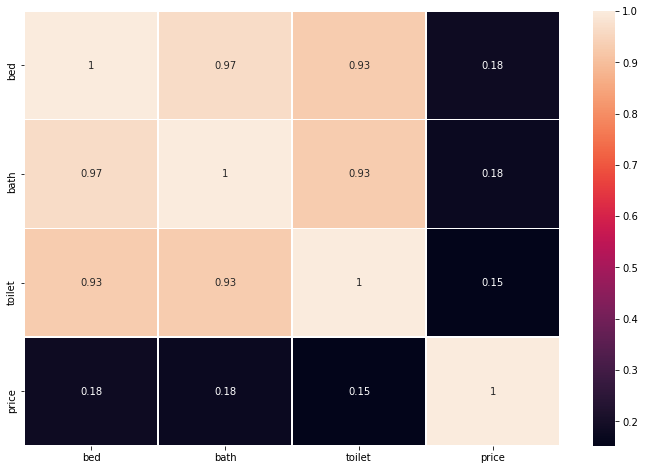

In [9]:
#VISUALIZATION
corr = data.corr()
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(corr, annot=True,  linewidths=.6, ax = ax)

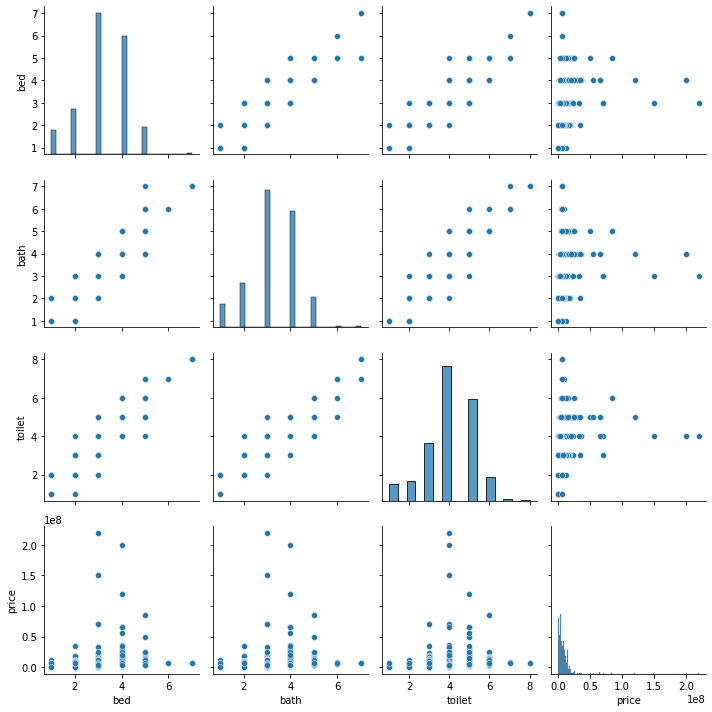

In [10]:
%matplotlib inline

# Calculate and show pairplot
sns.pairplot(data, height=2.5)
plt.tight_layout()

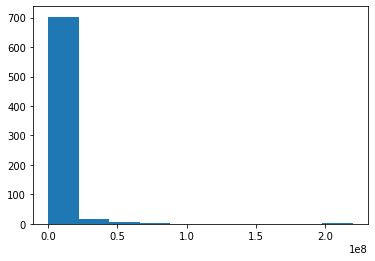

In [11]:
# Visualizing house prices
plt.hist(data['price'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


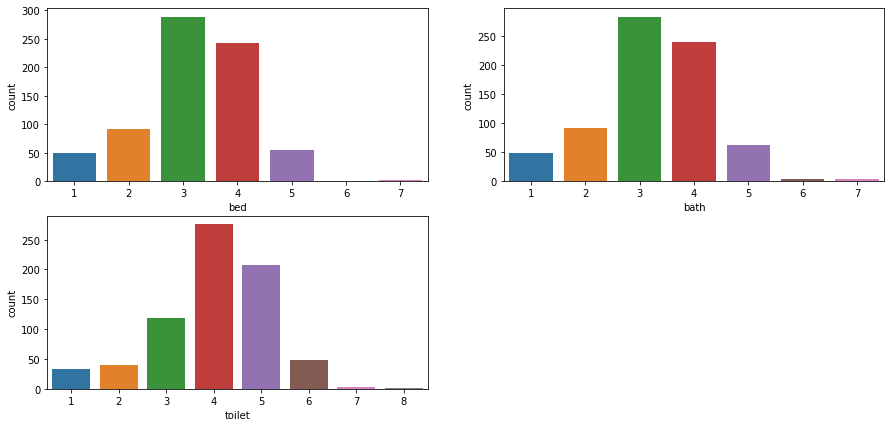

In [12]:

# Visualizing bedroom, bathroom, toilet &Parking space

fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
sns.countplot(data['bed'])
fig.add_subplot(2,2,2)
sns.countplot(data['bath'])
fig.add_subplot(2,2,3)
sns.countplot(data['toilet'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


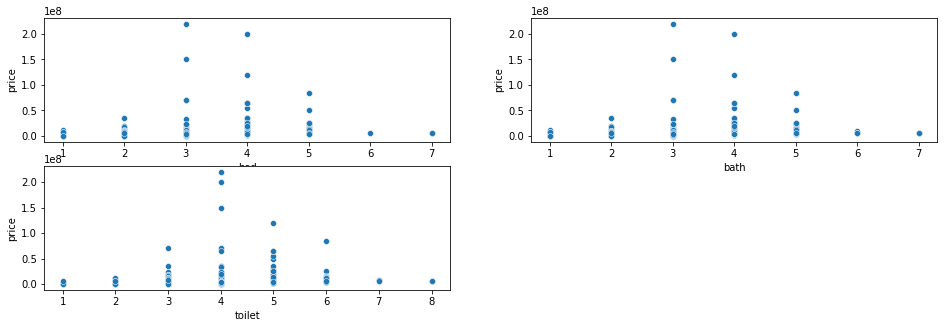

In [13]:
#visualizing some features distribution vs. price

fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.scatterplot(data['bed'], data['price'])
fig.add_subplot(2,2,2)
sns.scatterplot(data['bath'],data['price'])
fig.add_subplot(2,2,3)
sns.scatterplot(data['toilet'],data['price'])

Dataset Preparation (Splitting and Scaling)
Data is divided into the Train set and Test set. We use the Train set to make the algorithm learn the data’s behavior and then check the accuracy of our model on the Test set. Features (X): The columns that are inserted into our model will be used to make predictions. Prediction (Y): Target variable that will be predicted by the features

In [14]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras import metrics
from keras.models import load_model
from keras.models import model_from_json
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [15]:
data = pd.read_csv("rent_right_data.csv")
data = data.drop('type',axis=1)
data = data.drop('area',axis=1)
data.head(5)

,bed,bath,toilet,price
0,2,2,2,1000000
1,5,5,6,4000000
2,4,4,5,3500000
3,4,4,5,5500000
4,4,4,5,4000000


In [16]:

print(data)

     bed  bath  toilet     price
0      2     2       2   1000000
1      5     5       6   4000000
2      4     4       5   3500000
3      4     4       5   5500000
4      4     4       5   4000000
..   ...   ...     ...       ...
726    5     4       4   3000000
727    4     4       4  20000000
728    3     3       4   2200000
729    3     3       4   3700000
730    2     2       2   6500000

[731 rows x 4 columns]


In [27]:
# split into input (X) and output (y) variables
X = data.drop('price',axis =1).values
y = data['price'].values

In [29]:
#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [30]:
print(X)

[[2 2 2]
 [5 5 6]
 [4 4 5]
 ...
 [3 3 4]
 [3 3 4]
 [2 2 2]]


In [32]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(489, 3) (242, 3) (489,) (242,)


In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train.astype(np.float))
X_test = sc.transform(X_test.astype(np.float))

In [36]:
# create model
model = Sequential()
model.add(Dense(3, input_dim=3, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['MeanAbsoluteError','mse'])

In [38]:
# Training the Model
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=10, epochs=40)
model.summary()

Epoch 1/40
49/49 [==============================] - 0s 3ms/step - loss: 8295918.0000 - mean_absolute_error: 8295918.0000 - mse: 214246138839040.0000 - val_loss: 9522223.0000 - val_mean_absolute_error: 9522223.0000 - val_mse: 483919065513984.0000
Epoch 2/40
49/49 [==============================] - 0s 2ms/step - loss: 8295916.0000 - mean_absolute_error: 8295916.0000 - mse: 214246105284608.0000 - val_loss: 9522221.0000 - val_mean_absolute_error: 9522220.0000 - val_mse: 483919031959552.0000
Epoch 3/40
49/49 [==============================] - 0s 2ms/step - loss: 8295915.0000 - mean_absolute_error: 8295915.0000 - mse: 214246105284608.0000 - val_loss: 9522220.0000 - val_mean_absolute_error: 9522220.0000 - val_mse: 483918998405120.0000
Epoch 4/40
49/49 [==============================] - 0s 2ms/step - loss: 8295912.5000 - mean_absolute_error: 8295912.5000 - mse: 214246054952960.0000 - val_loss: 9522218.0000 - val_mean_absolute_error: 9522218.0000 - val_mse: 483918964850688.0000
Epoch 5/40
49/49

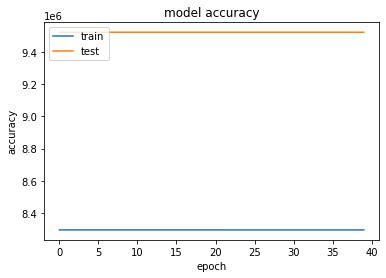

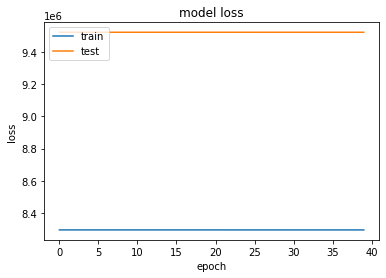

In [39]:
# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
# evaluate the keras model
model.evaluate(X_train, y_train)[1]

16/16 [==============================] - 0s 1ms/step - loss: 8295820.5000 - mean_absolute_error: 8295820.5000 - mse: 214244142350336.0000


8295820.5

MAE: 9522133.466445481
MSE: 483916978475463.2
RMSE: 21998113.066248734
VarScore: 1.3772215912144503e-06


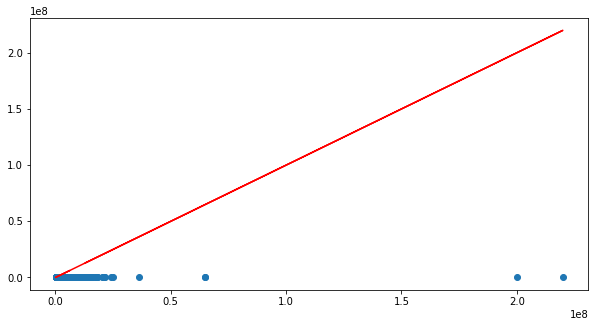

In [44]:
y_pred = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [45]:
from keras.models import load_model

model.save('my_model.h5')
del model

# returns a compiled model identical to the previous one
model = load_model('my_model.h5')

In [48]:
model.to_json

<bound method Model.to_json of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f426973dcf8>>

In [49]:
!pip install "tensorflow>=1.7.0"
!pip install tensorflowjs

     |████████████████████████████████| 71kB 3.6MB/s 
     |████████████████████████████████| 112kB 7.4MB/s 
  Found existing installation: tensorflow-hub 0.11.0
    Uninstalling tensorflow-hub-0.11.0:
      Successfully uninstalled tensorflow-hub-0.11.0


In [50]:
import tensorflowjs as tfjs

In [52]:
tfjs_target_dir = "/tmp/my_model.h5-tfjs"

tfjs.converters.save_keras_model(model, tfjs_target_dir)

/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/keras_h5_conversion.py:123: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)


In [53]:
!ls -la /tmp/my_model.h5-tfjs

total 16
drwxr-xr-x 2 root root 4096 Jan 20 21:28 .
drwxrwxrwt 1 root root 4096 Jan 20 21:28 ..
-rw-r--r-- 1 root root   64 Jan 20 21:28 group1-shard1of1.bin
-rw-r--r-- 1 root root 2219 Jan 20 21:28 model.json


In [54]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [56]:
# load json and create model
json_file = open('model.json', 'r')
load_model_json = json_file.read()
json_file.close()
load_model = model_from_json(load_model_json)
# load weights into new model
load_model.load_weights("model.h5")
print("Load model from disk")

Load model from disk


In [57]:
# evaluate loaded model on test data
load_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = load_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (load_model.metrics_names[1], score[1]*100))

accuracy: 0.00%


In [58]:
import json

In [59]:
# read file
with open('model.json', 'r') as myfile:
    data=myfile.read()

In [60]:
# parse file
obj = json.loads(data)

In [61]:
print(obj)

{'class_name': 'Sequential', 'config': {'name': 'sequential', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': [None, 3], 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'dense_input'}}, {'class_name': 'Dense', 'config': {'name': 'dense', 'trainable': True, 'batch_input_shape': [None, 3], 'dtype': 'float32', 'units': 3, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'RandomNormal', 'config': {'mean': 0.0, 'stddev': 0.05, 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'Dense', 'config': {'name': 'dense_1', 'trainable': True, 'dtype': 'float32', 'units': 1, 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'RandomNormal', 'config': {'mean': 0.0, 'stddev': 0.05, 'seed': None}}, 'bias_initializer': {'class_name': 'Zer